In [2]:
# Import the necessary Python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea  # Optional for better styling
import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the given Loan data and loading into a Loan dataframe
Loan_df = pd.read_csv(r'C:\Users\vwarke\OneDrive - Microsoft\Desktop\loan.csv')

In [4]:
# Display the first 5 rows of the DataFrame
Loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
# Display the last 5 rows of the DataFrame
Loan_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Returns (number_of_rows, number_of_columns)
Loan_df.shape 

(39717, 111)

In [7]:
# Summary of the DataFrame including data types and non-null values
Loan_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            int64  
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [8]:
#Identifying Duplicates: Use duplicated() to find duplicate rows.

duplicates = Loan_df.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
39712    False
39713    False
39714    False
39715    False
39716    False
Length: 39717, dtype: bool


In [9]:
# details of columns having all the values "NA" which is not required analysis.
columns_NA_Count=len(Loan_df.columns[Loan_df.isna().all()].tolist())
columns_NA_List=list(Loan_df.columns[Loan_df.isna().all()])
columns_NA_List

['annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 '

In [10]:
# Deleting columns having all the values "NA" which is not required analysis and after deleting 58 columns remaining from 111
Loan_df = Loan_df.dropna(axis=1, how="all")
Loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65%,162.87,B,B2,...,16-May,0.0,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27%,59.83,C,C4,...,13-Sep,0.0,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96%,84.33,C,C5,...,16-May,0.0,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49%,339.31,C,C1,...,16-Apr,0.0,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69%,67.79,B,B5,...,16-May,0.0,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07%,78.42,A,A4,...,10-Jun,NaN,0.0,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36,10.28%,275.38,C,C1,...,10-Jul,NaN,0.0,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36,8.07%,156.84,A,A4,...,7-Jun,NaN,0.0,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36,7.43%,155.38,A,A2,...,7-Jun,NaN,0.0,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [11]:
# Deleting rows having all the values "NA" which is not required analysis and after deleting 39717 columns remaining from 39717
Loan_df = Loan_df.dropna(axis=0, how="all")
Loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65%,162.87,B,B2,...,16-May,0.0,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27%,59.83,C,C4,...,13-Sep,0.0,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96%,84.33,C,C5,...,16-May,0.0,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49%,339.31,C,C1,...,16-Apr,0.0,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69%,67.79,B,B5,...,16-May,0.0,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07%,78.42,A,A4,...,10-Jun,NaN,0.0,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36,10.28%,275.38,C,C1,...,10-Jul,NaN,0.0,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36,8.07%,156.84,A,A4,...,7-Jun,NaN,0.0,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36,7.43%,155.38,A,A2,...,7-Jun,NaN,0.0,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [12]:
# Dropping text/description columns which wont contribute to overall analysis
Loan_df = Loan_df.drop(['url', 'emp_title', 'desc', 'title'],  axis=1)

In [13]:
# Dropping column sub_grade as the current analysis will limit to Grade only
Loan_df = Loan_df.drop(['sub_grade'],  axis=1)

In [14]:
#Dropping all columns with all zero values
Loan_df = Loan_df.loc[:, (Loan_df != 0).any(axis=0)]

In [15]:
# Dropping column which having same unique value 
Loan_df.shape
Loan_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  int64  
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

In [16]:
Loan_df = Loan_df.drop(['pub_rec_bankruptcies'],  axis=1)

In [17]:
Loan_df = Loan_df.drop(['tax_liens'],  axis=1)

In [18]:
Loan_df = Loan_df.drop(['pymnt_plan'],  axis=1)

In [19]:
Loan_df = Loan_df.drop(['initial_list_status'],  axis=1)

In [20]:
Loan_df = Loan_df.drop(['application_type'],  axis=1)

In [21]:
Loan_df = Loan_df.drop(['policy_code'],  axis=1)

In [22]:
Loan_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  int64  
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

In [23]:
def drop_columns_high_na(Loan_df, threshold=0.65):
    #"""Drop columns from a DataFrame where the percentage of empty values is greater than the threshold.
    #Parameters:
    #df (DataFrame): The DataFrame to process.
    #threshold (float): The threshold for dropping columns, default is 65%.
    #Returns:
    #DataFrame: The DataFrame with columns dropped based on the threshold.
    
    # Calculate the percentage of empty values for each column
    na_percentage = Loan_df.isnull().mean()
    
    # Identify columns to drop based on the threshold
    columns_to_drop = na_percentage[na_percentage > threshold].index
    
    # Drop the identified columns
    Loan_df.drop(columns=columns_to_drop, inplace=True)
    
    return df

In [24]:
na_percentage = Loan_df.isnull().mean()
print(na_percentage)

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
emp_length                    0.027066
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
purpose                       0.000000
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
inq_last_6mths                0.000000
mths_since_last_delinq        0.000000
mths_since_last_record        0.000000
open_acc                      0.000000
pub_rec                  

In [25]:
#Check Loan status
Loan_df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [26]:
#Dropping the rows for loan_status=='Current' as the loan pay process is ongoing so we cannot concider with default category to pay the loan
Loan_df= Loan_df[Loan_df['loan_status']!='Current']
print("Total number of rows now:",len(Loan_df)) ## Total no of rows now.

Total number of rows now: 38577


In [ ]:
########################## Data Formatting and Conversion  ##########################

In [27]:
## Cleaning column 'int_rate' by removing '%' symbol.

Loan_df['int_rate'] = Loan_df['int_rate'].apply(lambda x: float(x.rstrip('%')))
Loan_df['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [28]:
## Converting interest rate data to category to get more insight for each segment
Loan_df['intRateCategory'] = pd.cut(Loan_df['int_rate'], [0, 5, 10, 15, 20, 25], 
                                 labels=['0-5', '5-10', '10-15', '15-20', '20+'])

In [29]:
Loan_df['intRateCategory'].value_counts()

intRateCategory
10-15    18265
5-10     12316
15-20     7226
20+        770
0-5          0
Name: count, dtype: int64

In [30]:
Loan_df['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [31]:
## Converting loan amount data to category to get more insight for each segment
Loan_df['loanAmountRange'] = pd.cut(Loan_df['loan_amnt'], [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], 
            labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '30000+'])

In [32]:
Loan_df['loanAmountRange'].value_counts()

loanAmountRange
5000-10000     12802
0-5000          9472
10000-15000     7683
15000-20000     4349
20000-25000     2836
30000+           735
25000-30000      700
Name: count, dtype: int64

In [50]:
Loan_df['annual_inc'].describe()

count    3.617600e+04
mean     6.749276e+04
std      6.339340e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.787300e+04
75%      8.000000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [51]:
## Converting annual Income data to category to get more insight for each segment

Loan_df['annualIncomeRange'] = pd.cut(Loan_df['annual_inc'], [0, 20000, 40000, 60000, 80000, 1000000], 
                                 labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000+'])

In [52]:
Loan_df['annualIncomeRange'].value_counts()

annualIncomeRange
40000-60000    10885
80000+          8935
20000-40000     8127
60000-80000     7206
0-20000         1009
Name: count, dtype: int64

In [33]:
# Converting emp_length as numerical data to create more effective statistical analysis as compared to nominal values
Loan_df['emp_length'] = Loan_df['emp_length'].replace({'< 1 year': 0, '2 years': 2, '3 years': 3, 
                                                         '7 years': 7, '4 years': 4, '5 years': 5, 
                                                         '1 year': 1, '6 years': 6, '8 years': 8, 
                                                         '9 years': 9,  '10+ years': 10})
print(Loan_df['emp_length'] )

0        10.0
1         0.0
2        10.0
3        10.0
5         3.0
         ... 
39712     4.0
39713     3.0
39714     0.0
39715     0.0
39716     0.0
Name: emp_length, Length: 38577, dtype: float64


In [34]:
#drop emp_length with NA value
Loan_df = Loan_df[Loan_df['emp_length'].notna()]

In [35]:
Loan_df['emp_length'].value_counts()

emp_length
10.0    8488
0.0     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: count, dtype: int64

In [ ]:
############################## Identifing and handling outliers / extrem values #################################

In [36]:
print("before outliers removal",Loan_df.shape)

before outliers removal (37544, 46)


{'whiskers': [<matplotlib.lines.Line2D at 0x23280b8af50>,
 'caps': [<matplotlib.lines.Line2D at 0x232fee48d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x23280b8a6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x23280b7d790>],
 'fliers': [<matplotlib.lines.Line2D at 0x23280b7e110>],
 'means': []}

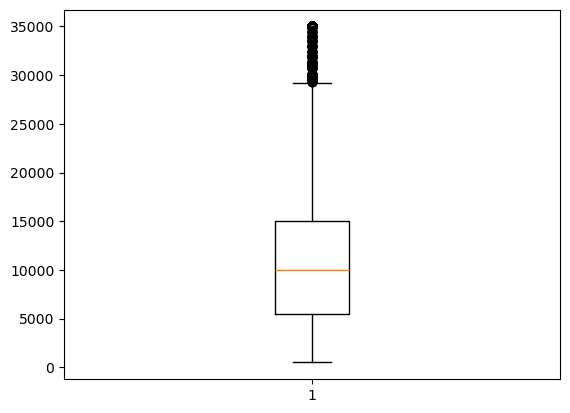

In [37]:
#outliers for loan_amnt
plt.boxplot(Loan_df.loan_amnt)

After outliers removal (36487, 46)


{'whiskers': [<matplotlib.lines.Line2D at 0x23280ae6890>,
 'caps': [<matplotlib.lines.Line2D at 0x23280ae7f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x23280ae5c50>],
 'medians': [<matplotlib.lines.Line2D at 0x23280ad1610>],
 'fliers': [<matplotlib.lines.Line2D at 0x23280ad21d0>],
 'means': []}

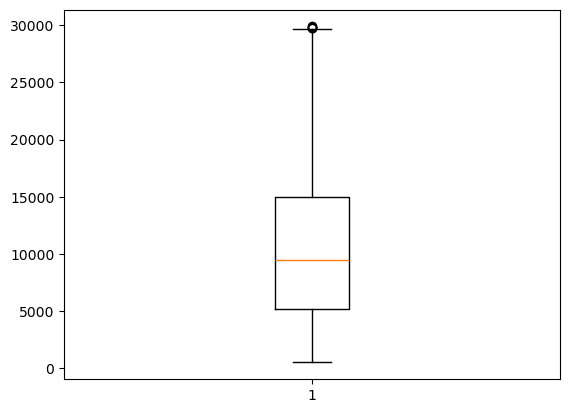

In [38]:
# Handling outliers for loan_amnt
Loan_df=Loan_df[Loan_df.loan_amnt<30000]
print("After outliers removal",Loan_df.shape)
plt.boxplot(Loan_df.loan_amnt)

before outliers removal (36487, 46)


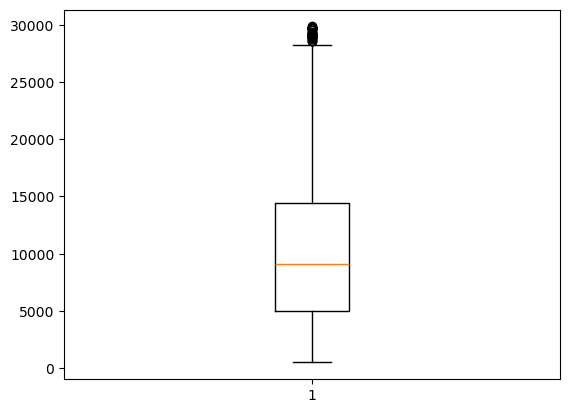

In [39]:
#outliers for funded_amnt
plt.boxplot(Loan_df.funded_amnt)
print("before outliers removal",Loan_df.shape)

After outliers removal (36176, 46)


{'whiskers': [<matplotlib.lines.Line2D at 0x2328540a490>,
 'caps': [<matplotlib.lines.Line2D at 0x2328540bc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x23285409850>],
 'medians': [<matplotlib.lines.Line2D at 0x23285411250>],
 'fliers': [<matplotlib.lines.Line2D at 0x23285411c90>],
 'means': []}

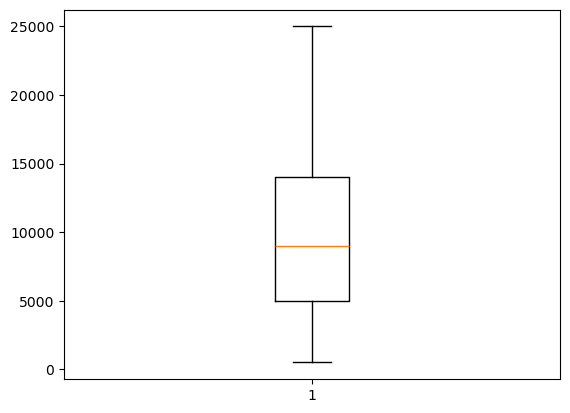

In [40]:
# Handling outliers for funded_amnt
Loan_df=Loan_df[Loan_df.funded_amnt<=25000]
print("After outliers removal",Loan_df.shape)
plt.boxplot(Loan_df.funded_amnt)

Before outliers removal (36176, 46)


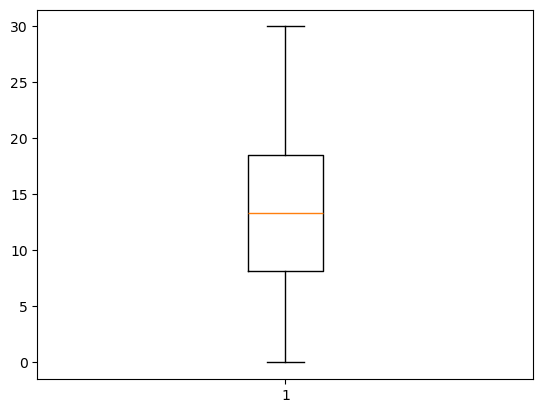

In [41]:
#outliers for dti which seems as expected no need to handle
plt.boxplot(Loan_df.dti)
print("Before outliers removal",Loan_df.shape)

In [ ]:
######################Univarient Analysis######################

Text(0.5, 9.444444444444438, 'Employment length (in years)')

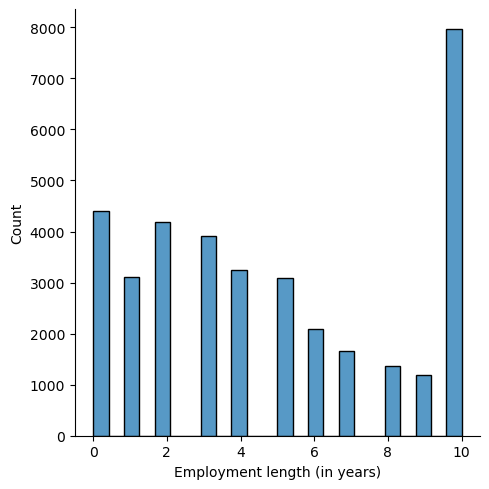

In [43]:
#Create a distribution plot for emp_length
sns.displot(Loan_df.emp_length)
plt.xlabel('Employment length (in years)')

## Observation: 
## There are approximate 8000 employess who have taken the loan having tenuer greater than 10 years 

Text(0.5, 9.444444444444438, 'Term')

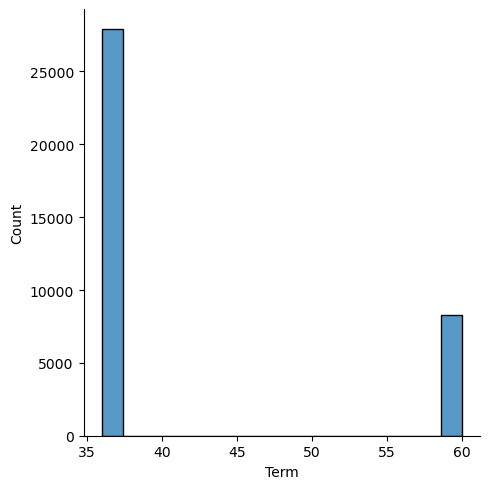

In [45]:
#Create a distribution plot for Term
sns.displot(Loan_df.term)
plt.xlabel('Term')

## Observation: 
## No of employess who taken the loan for Term of 36 months is greater than 60 months

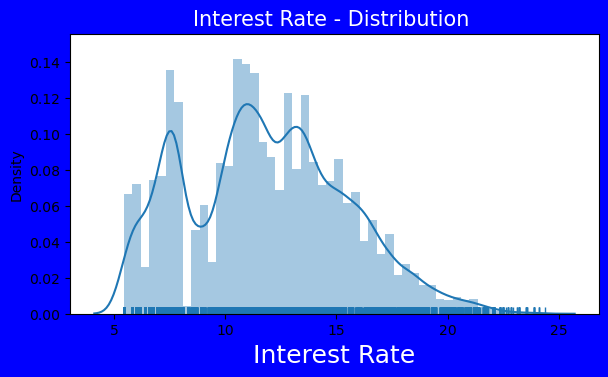

In [46]:
#### Univarient Analysis#### Univariate Analysis on Interest rate-
## interest rate distribution and box plot - Quantitative Variable Analysis
plt.figure(figsize=(15,8),facecolor='b')
plt.subplot(2, 2, 1)
intRateDistPlot = sns.distplot(Loan_df['int_rate'], rug=True)
intRateDistPlot.set_title('Interest Rate - Distribution ',fontsize=15,color='w')
intRateDistPlot.set_xlabel('Interest Rate',fontsize=18,color='w')
plt.show()

# Observations: 
# maximum loans have interest rate between 9% - 14%. 

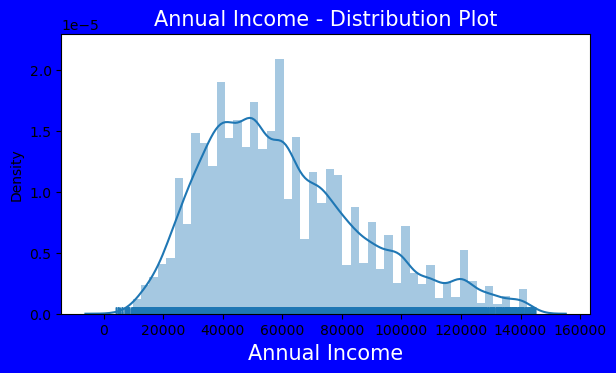

In [47]:
# Univariate Analysis on Annual Income-
## Annual Income distribution and box plot - Quantitative Variable Analysis

plt.figure(figsize=(15,8),facecolor='b')
plt.subplot(2, 2, 1)
annualIncomeDistPlot = sns.distplot(Loan_df[(Loan_df['annual_inc'] < 145000.0)]['annual_inc'], rug=True)
annualIncomeDistPlot.set_title('Annual Income - Distribution Plot',fontsize=15,color='w')
annualIncomeDistPlot.set_xlabel('Annual Income',fontsize=15,color='w')
plt.show()

#Observations: 
# maximum loans have been taken by the borrower having annual income of 40K - 80K.

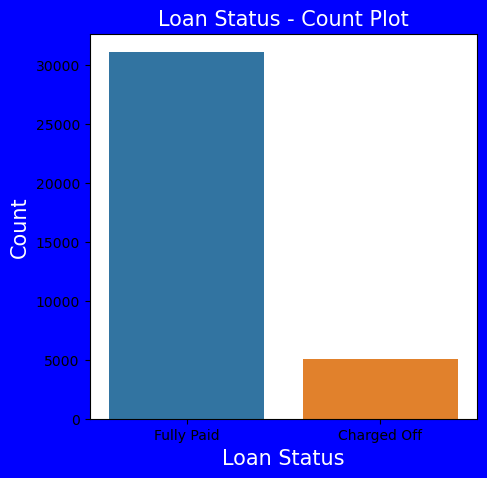

loan_status
Fully Paid     31076
Charged Off     5100
Name: count, dtype: int64

In [48]:
# Univariate Analysis on Loan Status
## Loan Status Count Plot - Unordered Categorical Variable Analysis

plt.figure(figsize=(5,5),facecolor='b')

loanStatusCountPlot = sns.countplot(x = 'loan_status', data=Loan_df)
loanStatusCountPlot.set_title('Loan Status - Count Plot',fontsize=15,color='w')
loanStatusCountPlot.set_xlabel('Loan Status',fontsize=15,color='w')
loanStatusCountPlot.set_ylabel('Count',fontsize=15,color='w')

plt.show()

Loan_df['loan_status'].value_counts()

 #Observation: 
# approximately 15% of total loans are charged off.

In [ ]:
############################ Byvarient Analysis####################################

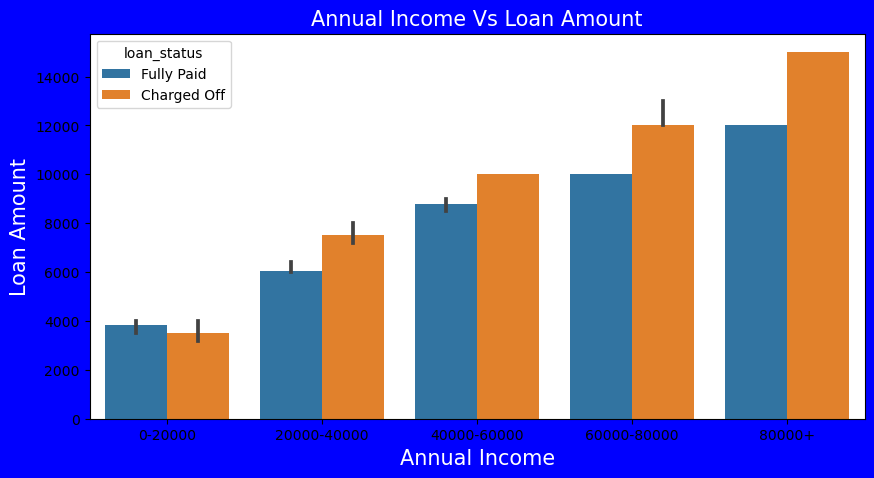

In [53]:
## Bivariate Analysis - Annual Income Category and Loan Amount

plt.figure(figsize=(10,5),facecolor='b')

plot = sns.barplot(y='loan_amnt', x = 'annualIncomeRange', hue = 'loan_status', data= Loan_df, estimator=np.median)
plot.set_title('Annual Income Vs Loan Amount',fontsize=15,color='w')
plot.set_xlabel('Annual Income',fontsize=15,color='w')
plot.set_ylabel('Loan Amount',fontsize=15,color='w')

plt.show()


## Observation: 
## This implies that people who borrow more money are more likely to default, which belong to the same income category

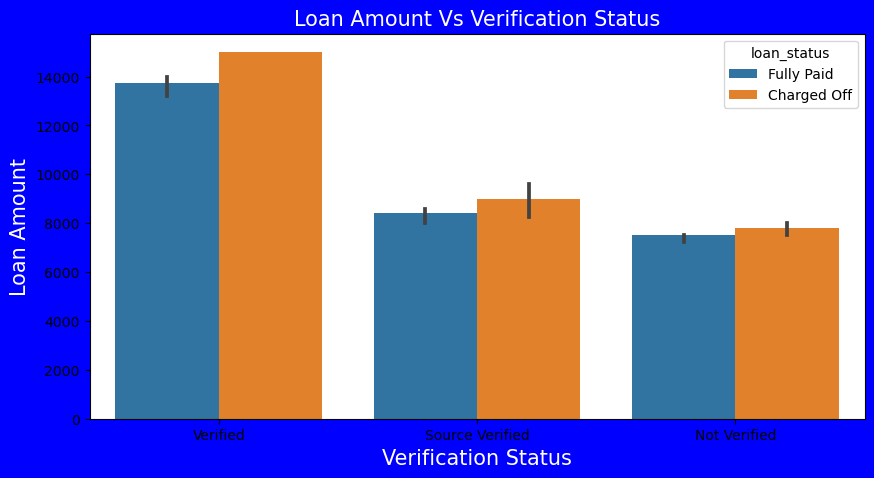

In [54]:
## Bivariate Analysis -  Loan Amount and Verification Status

plt.figure(figsize=(10,5),facecolor='b')

plot = sns.barplot(y='loan_amnt', x = 'verification_status', hue = 'loan_status', data= Loan_df, estimator= np.median)
plot.set_title('Loan Amount Vs Verification Status',fontsize=15,color='w')
plot.set_ylabel('Loan Amount',fontsize=15,color='w')
plot.set_xlabel('Verification Status',fontsize=15,color='w')

plt.show()


## Observation: 
## Verified borrowers can get more money. 
#Chargeoff loans are bigger than fully paid ones.